Import OpenCV, Numpy and Matplotlib as always

In [46]:
import cv2
import math
import numpy as np
import random as rng
from matplotlib import pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets
import urllib.request
%matplotlib inline

Use <a href="https://docs.opencv.org/3.4.1/d4/da8/group__imgcodecs.html#ga288b8b3da0892bd651fce07b3bbd3a56">imread</a> function to read image from file. Since edge detection functions <b>require</b> a single channel input image, we must convert the input image into grayscale by using <a href="https://docs.opencv.org/3.4.1/d7/d1b/group__imgproc__misc.html#ga397ae87e1288a81d2363b61574eb8cab">cvtColor</a>.

## Edge Detection

Canny Edge Detector
Canny edge detector is a popular edge detection algorithm. It is a multi-stages algorithm based on Sobel edge detector and is considered to give a better result. You can read <a href="https://docs.opencv.org/3.4.2/da/d22/tutorial_py_canny.html">here</a> for short summary of this algorithm. You can Canny edge detector by calling <a href="https://docs.opencv.org/3.4.2/dd/d1a/group__imgproc__feature.html#ga04723e007ed888ddf11d9ba04e2232de">cv2.Canny</a>


In [ ]:
# Use ipywidgets and interact function to see the result of Canny edge detctor by yourself.
from ipywidgets import interact
def canny(th1,th2):
    canny_img = cv2.Canny(inputImageGray,th1,th2)
    plt.figure(figsize=(5,5))
    plt.imshow(canny_img, cmap='gray')
    plt.show()
interact(canny, th1=widgets.IntSlider(min=0,max=255,step=1,value=0),th2=widgets.IntSlider(min=0,max=255,step=1,value=0));
####

interactive(children=(IntSlider(value=0, description='th1', max=255), IntSlider(value=0, description='th2', ma…

### Structured Edge Detector
[Bonus] The gradient based edge detectors are typically susceptible to noise in the image and it is difficult to overcome this problem by using traditional pixel features. Instead of finding suitable rule-based methods for each task, a learning based edge detector named "Structured Edge" was proposed by Microsoft researcher team in International Conference on Computer Vision 2013 (ICCV2013). This algorithm use random forest to give each pixel edge intensity value based on locality feature. You can read their paper <a href="https://www.microsoft.com/en-us/research/wp-content/uploads/2013/12/DollarICCV13edges.pdf">here</a>.

In [ ]:
# Grab edge model file from opencv_contrib repository
urllib.request.urlretrieve('https://raw.githubusercontent.com/opencv/opencv_extra/master/testdata/cv/ximgproc/model.yml.gz', 'assets/structuredEdgeModel.yml.gz')

('assets/structuredEdgeModel.yml.gz',
 <http.client.HTTPMessage at 0x7fd15041b278>)

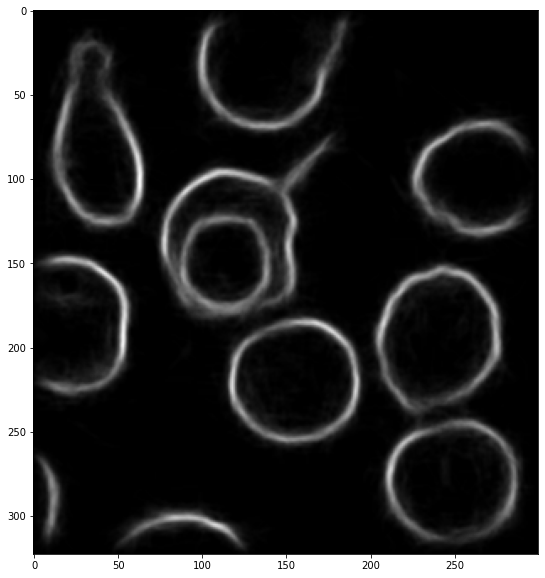

In [ ]:
# Structured Edge Detector requires input to be in RGB order
# Microsoft paper: random forest edge detector 
structuredEdgeDetector = cv2.ximgproc.createStructuredEdgeDetection('assets/structuredEdgeModel.yml.gz')
inputImageRGB = cv2.cvtColor(inputImage, cv2.COLOR_BGR2RGB)
structuredEdgeOutput = np.uint8(structuredEdgeDetector.detectEdges(np.float32(inputImageRGB) / 255.0)*255)
plt.figure(figsize=(10,10))
plt.imshow(structuredEdgeOutput, cmap='gray')
plt.show()

### Holistically-Nested Edge Detection (HED)
[Bonus] As mentioned in previous method, the pioneer gradient based methods are typically susceptible to noise in the image difficult to overcome this problem by using traditional pixel features. Holistically-Nested Edge Detection (HED) was proposed in International Conference on Computer Vision 2015 (ICCV2015) , attempts to address the limitations of the feature based edge detector through an fully convolutional neural network structure. You can read their paper <a href="https://arxiv.org/abs/1504.06375">here</a>

In [ ]:
# Grab HED model file from author repository
urllib.request.urlretrieve('http://vcl.ucsd.edu/hed/hed_pretrained_bsds.caffemodel', 'assets/hed_pretrained_bsds.caffemodel')
urllib.request.urlretrieve('https://raw.githubusercontent.com/s9xie/hed/master/examples/hed/deploy.prototxt', 'assets/deploy.prototxt')

('assets/deploy.prototxt', <http.client.HTTPMessage at 0x7fd15047bc50>)

In [ ]:
inputTensor = cv2.dnn.blobFromImage(inputImage, scalefactor=1.0, size=inputImage.shape[0:2], mean=(104.00698793, 116.66876762, 122.67891434), swapRB=True, crop=False)
hedNet.setInput(inputTensor)
hedNetOutput = cv2.resize(hedNet.forward().squeeze(), inputImage.shape[0:2])

Using both X-Y Sobel edge output and apply simple threshold to keep only strong edge

Categorize each strong edge pixel into contours by using <a href="https://docs.opencv.org/4.5.1/d3/dc0/group__imgproc__shape.html#gae4156f04053c44f886e387cff0ef6e08">cv2.findContour</a>

Colorize each contour by using <a href="https://docs.opencv.org/3.4.2/d6/d6e/group__imgproc__draw.html#ga746c0625f1781f1ffc9056259103edbc">cv2.drawContour</a>. You will see that there are some <b>noise</b> contours appear.

## Card Detector
Assume that we got a requirement from Chula Office of Registrar to build an automate student id card face verification system (validating an identity based on the real face and face image on card). Your team's task is to implement an automatic algorithm to <b>extract</b> student faces from their id card and collect their card into image file. It should be note that the input images can be in <b>arbitrary viewpoint</b> so you must apply homography to correct perspective distortion. You should applied the algorithm on your student id card. <b>Don't forget to censor your sensitive information.</b>

<b>Guidance</b>
1. Apply your choice edge detector
2. Categorize each edge pixel into contours by using cv2.findContours
3. Pick the largest contour and find its hull using <a href="https://docs.opencv.org/3.4.2/d3/dc0/group__imgproc__shape.html#ga014b28e56cb8854c0de4a211cb2be656">cv2.convexHull</a>
4. Approximate contour into 4 points polygon to find its corners using <a href="https://docs.opencv.org/3.4.2/d3/dc0/group__imgproc__shape.html#ga0012a5fdaea70b8a9970165d98722b4c">cv2.approxPolyDP</a>
5. Correct the perspective distortion by using cv2.getPerspectiveTransform / cv2.warpPerspective
6. Save the output warped id card image and face into file using cv2.imwrite 

<b>Hint</b>
- Too big image sometimes gives a poor edge detection result.
- This <a href="https://docs.opencv.org/3.4.2/dd/d49/tutorial_py_contour_features.html">link</a> helps a lot for 3-4
- The points order for cv2.getPerspectiveTransform must be consistent between source and destination.
- You can use Chula student id card face mask is given in <b>'assets/Lab3-FaceMask.bmp'</b>

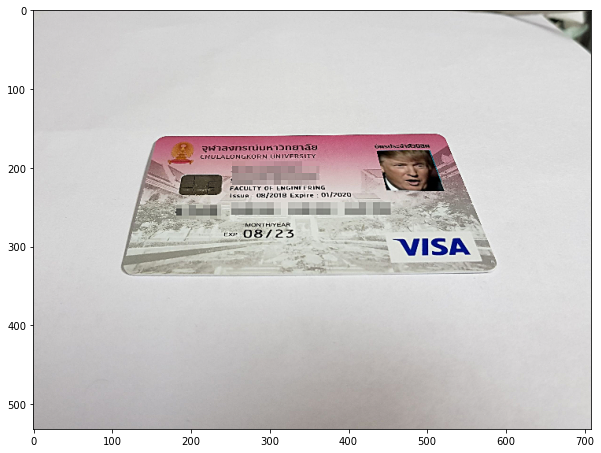

In [5]:
import cv2
from matplotlib import pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets
import numpy as np

def plot_img(img,title):
    plt.figure(figsize=(10,10))
    plt.title(title)
    plt.imshow(img,cmap='gray')
    plt.show()

inputImage = cv2.imread('assets/card.jpg')
inputImage = cv2.resize(inputImage,None,fx=0.3,fy=0.3)
inputImageGray = cv2.cvtColor(inputImage,cv2.COLOR_BGR2GRAY)
img = cv2.cvtColor(inputImage,cv2.COLOR_BGR2RGB)
maskImage = cv2.imread('assets/mask.bmp')
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(inputImage,cv2.COLOR_BGR2RGB)  )
plt.show()

In [49]:
def canny(th1,th2,apartureSize):
    input_img = (hedNetOutput*255).astype(np.uint8)
    canny_img = cv2.Canny(input_img,th1,th2,apartureSize)
    plt.figure(figsize=(5,5))
    plt.imshow(canny_img, cmap='gray')
    plt.show()
interact(canny, th1=widgets.IntSlider(min=0,max=1000,step=2,value=0),th2=widgets.IntSlider(min=0,max=1000,step=2,value=0), apartureSize= widgets.IntSlider(min=0,max=10,step=2,value=0));

interactive(children=(IntSlider(value=0, description='th1', max=1000, step=2), IntSlider(value=0, description=…

In [50]:
inputTensor = cv2.dnn.blobFromImage(inputImage, scalefactor=1.0, size=inputImage.shape[0:2], mean=(104.00698793, 116.66876762, 122.67891434), swapRB=True, crop=False)
hedNet.setInput(inputTensor)
hedNetOutput = cv2.resize(hedNet.forward().squeeze(), (inputImage.shape[1],inputImage.shape[0]))
hedNetOutput = (hedNetOutput*255).astype(np.uint8)
def threshold_edge(thres_value):
  img = hedNetOutput
  _, thresh = cv2.threshold(img,thres_value,255,cv2.THRESH_BINARY) # OTSU_thresholdin
  plot_img(thresh,'thresh')
  return thresh
interact(threshold_edge, thres_value=widgets.IntSlider(min=0,max=255,step=1,value=50))

interactive(children=(IntSlider(value=50, description='thres_value', max=255), Output()), _dom_classes=('widge…

<function __main__.threshold_edge>

In [51]:
def threshold_edge(thres_value):
  img = inputImageGray.astype(np.uint8)
  _, thresh = cv2.threshold(img,thres_value,255,cv2.THRESH_BINARY) # OTSU_thresholdin
  plot_img(thresh,'thresh')
  return thresh
interact(threshold_edge, thres_value=widgets.IntSlider(min=0,max=255,step=1,value=0))

interactive(children=(IntSlider(value=0, description='thres_value', max=255), Output()), _dom_classes=('widget…

<function __main__.threshold_edge>

In [52]:
structuredEdgeOutput = np.uint8(structuredEdgeDetector.detectEdges(np.float32(img) / 255.0)*255)
# plot_img( structuredEdgeOutput, "structuredEdgeOutput")
def threshold_edge(thres_value):
  img = structuredEdgeOutput
  _, thresh = cv2.threshold(img,thres_value,255,cv2.THRESH_BINARY) # OTSU_thresholdin
  plot_img(thresh,'thresh')
  return thresh
interact(threshold_edge, thres_value=widgets.IntSlider(min=0,max=255,step=1,value=10))

interactive(children=(IntSlider(value=10, description='thres_value', max=255), Output()), _dom_classes=('widge…

<function __main__.threshold_edge>

In [ ]:
structuredEdgeOutput = np.uint8(structuredEdgeDetector.detectEdges(np.float32(img) / 255.0)*255)
# plot_img( structuredEdgeOutput, "structuredEdgeOutput")
def canny(th1,th2,apartureSize):
    input_img = structuredEdgeOutput
    canny_img = cv2.Canny(input_img,th1,th2,apartureSize)
    plt.figure(figsize=(5,5))
    plt.imshow(canny_img, cmap='gray')
    plt.show()
    return canny_img
interact(canny, th1=widgets.IntSlider(min=0,max=1000,step=2,value=0),th2=widgets.IntSlider(min=0,max=1000,step=2,value=0), apartureSize= widgets.IntSlider(min=0,max=10,step=2,value=0));

interactive(children=(IntSlider(value=0, description='th1', max=1000, step=2), IntSlider(value=0, description=…

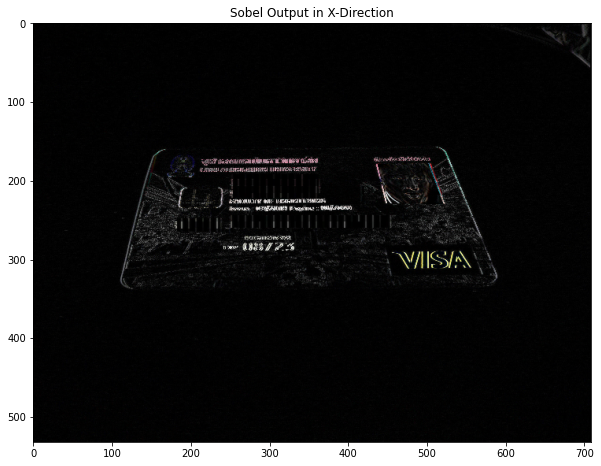

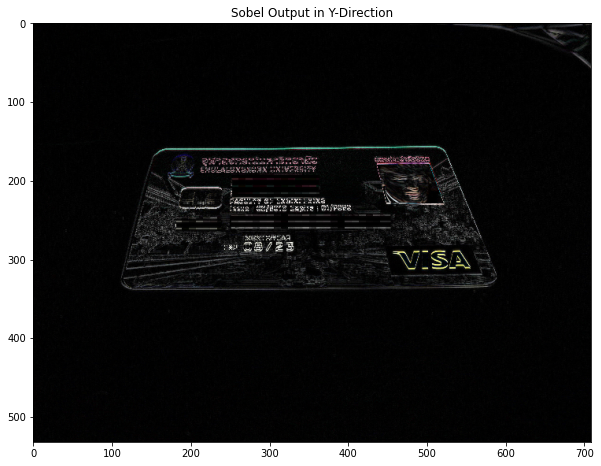

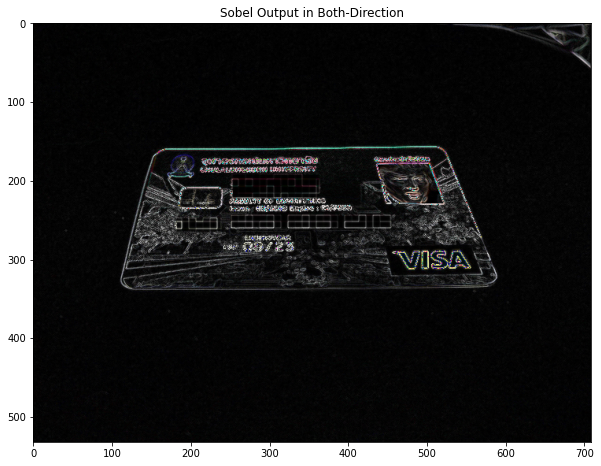

<function __main__.sobel>

In [ ]:
def sobel(ksize):
  inputImageGray = img.astype(np.uint8)
  sobelXOutput_64F = cv2.Sobel(inputImageGray,cv2.CV_64F,1,0,ksize=ksize)  # first, apply with Float64
  print(sobelXOutput_64F.dtype)
  sobelXOutput_64F = np.uint8(np.absolute(sobelXOutput_64F))
  sobelYOutput_64F = cv2.Sobel(inputImageGray,cv2.CV_64F,0,1,ksize=ksize)
  sobelYOutput_64F = np.uint8(np.absolute(sobelYOutput_64F))
  plt.figure(figsize=(10,10))
  plt.title('Sobel Output in X-Direction')
  plt.imshow(sobelXOutput_64F, cmap='gray')
  plt.figure(figsize=(10,10))
  plt.title('Sobel Output in Y-Direction')
  plt.imshow(sobelYOutput_64F, cmap='gray')
  plt.show()
  plt.figure(figsize=(10,10))
  plt.title('Sobel Output in Both-Direction')
  plt.imshow(sobelXOutput_64F + sobelYOutput_64F, cmap='gray')  # X_edge + Y_edge
  plt.show()

interact(sobel, ksize=widgets.IntSlider(min=1,max=21,step=2,value=1))

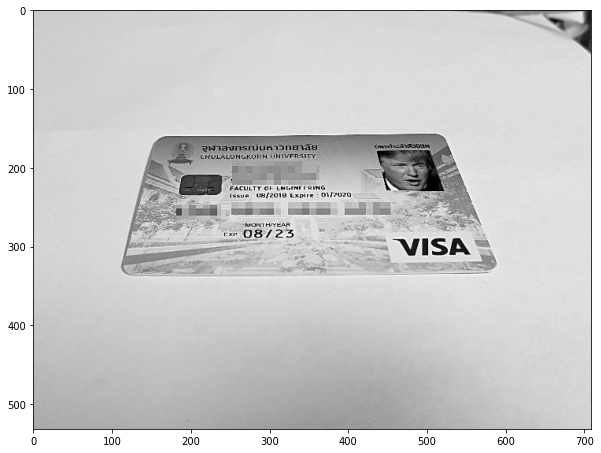

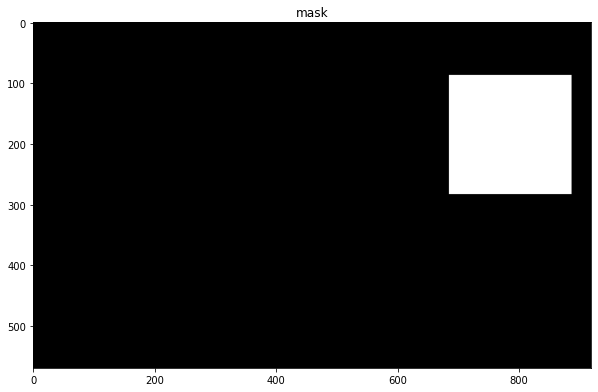

In [ ]:
import cv2
from matplotlib import pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets
import numpy as np

def plot_img(img,title):
    plt.figure(figsize=(10,10))
    plt.title(title)
    plt.imshow(img)
    plt.show()

inputImage = cv2.imread('assets/card.jpg')
inputImage = cv2.resize(inputImage,None,fx=0.3,fy=0.3)
inputImageGray = cv2.cvtColor(inputImage,cv2.COLOR_BGR2GRAY)
img 
maskImage = cv2.imread('assets/mask.bmp')
plt.figure(figsize=(10,10))
plt.imshow(inputImageGray)
plt.show()
plot_img(maskImage,'mask')

In [ ]:
inputImage = cv2.imread('aassets/card.jpg')
inputImage = cv2.resize(inputImage,None,fx=0.3,fy=0.3)
gray_img = cv2.cvtColor(inputImage,cv2.COLOR_BGR2GRAY)
img = cv2.cvtColor(inputImage,cv2.COLOR_BGR2RGB)
# edge_image = cv2.Canny(gray_img,340,118) 
# canny_hed =  cv2.Canny((hedNetOutput*255).astype(np.uint8),798,300)    
# canny_se = canny(20,10,apartureSize=1)

structuredEdgeOutput = np.uint8(structuredEdgeDetector.detectEdges(np.float32(img) / 255.0)*255)
_,thresh = cv2.threshold(structuredEdgeOutput,10,255,cv2.THRESH_BINARY)
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)


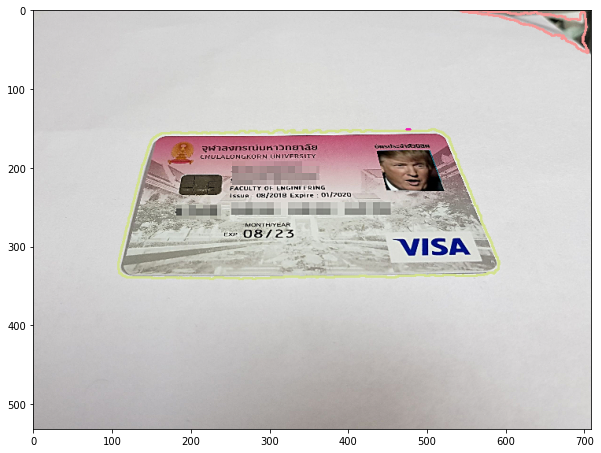

In [ ]:
# overview of the card contours
def draw_contours(inputImage,contours):
  img = np.array(inputImage)
  import random as rng
  for rcbContourIdx in range(len(contours)):
      color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
      # Calculates the bounding rectangle of a contour
      x, y, w, h = cv2.boundingRect(contours[rcbContourIdx])
      cv2.drawContours(img, contours, rcbContourIdx, color, 2)
      # cv2.rectangle(img,(x,y),(x+w,y+h),color,3)
  plt.figure(figsize=(10,10))
  plt.imshow(img)
  plt.show()
draw_contours(img,contours)

[79908.5, 2431.0, 0.0]


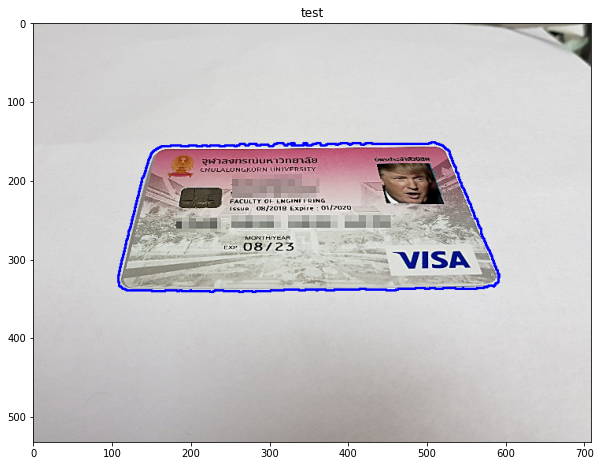

(532, 709, 3)


In [ ]:
card_img = np.array(img)
areas = [cv2.contourArea(a) for a in contours]
sorted_areas = sorted(areas,reverse=True)
print(sorted_areas)
card_contour_idx = areas.index(sorted_areas[0])
card_contour = contours[card_contour_idx]
cv2.drawContours(card_img, contours, card_contour_idx, [0,0,255], 2)
plot_img(card_img,'test')
print(card_img.shape)

4 [[[592 319]]

 [[108 328]]

 [[151 163]]

 [[520 155]]]


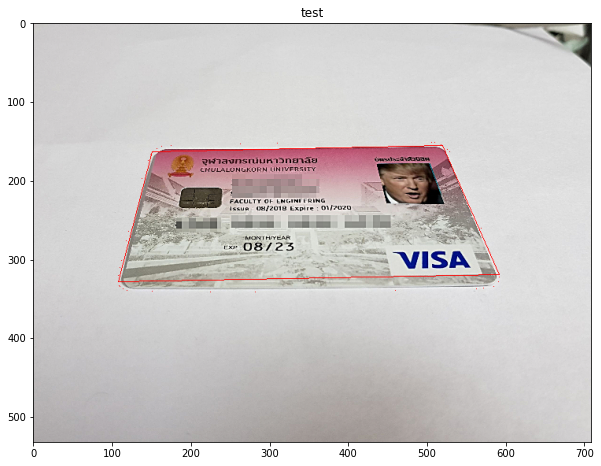

(532, 709, 3)


In [ ]:
card_img = np.array(img)
card_hull = cv2.convexHull(card_contour,returnPoints=True)
cv2.polylines(card_img,card_hull,True,(255,0,0))

approx = cv2.approxPolyDP(card_hull,18,True)
print(len(approx) ,approx)
pts = approx 

cv2.polylines(card_img,[pts],True,(0,255,255))
cv2.polylines(card_img,[pts],True,(255,0,0))

plot_img(card_img,'test')
print(card_img.shape)

In [ ]:
# these functions perform point preparation and perspective transform
# these functions are adapt from : https://www.pyimagesearch.com/2014/08/25/4-point-opencv-getperspective-transform-example/
# this post is also useful: https://www.pyimagesearch.com/2014/05/05/building-pokedex-python-opencv-perspective-warping-step-5-6/
def four_point_transform(image,pts,maskImage):
  rect = order_points(pts)
  (tl, tr, br, bl) = rect
  print(maskImage.shape)
  h,w,_ =  maskImage.shape
  dst = np.array([[0,0],[w-1,0],[w-1,h-1],[0,h-1]], dtype = "float32")
  # compute the perspective transform matrix and then apply it
  M = cv2.getPerspectiveTransform(rect, dst)  # M is transformation matrix 
  warped = cv2.warpPerspective(image, M, (w, h))
  # return the warped image
  return warped

def order_points(pts):
  rect = np.zeros((4, 2), dtype = "float32")
  s = pts.sum(axis = 1)
  rect[0] = pts[np.argmin(s)]
  rect[2] = pts[np.argmax(s)]
  diff = np.diff(pts, axis = 1)
  rect[1] = pts[np.argmin(diff)]
  rect[3] = pts[np.argmax(diff)]
  # return the ordered coordinates
  return rect

In [ ]:
card_img = np.array(img)
approx = approx.reshape(4,2)
warped = four_point_transform(card_img, approx,maskImage)
# card = cv2.resize(warped,(860,580) )
plot_img(warped,'card')
plot_img(warped&maskImage, 'face')

In [ ]:
'''
firstly, I have tried a lot of edge detection algorithm.
but the most accurate one is the structure edge.
after performing structure edge detection, I have also applied threshloding to eliminate small noises. 
and then finding contour algorithm is performed.
after that, I have filtered those contours result by the area; the biggest one should be the card contour.
the card is then performed by ConvexHull and approxPolyDP to get  Uniform Polygon which we would expect it to be a rectangle because of prior knowledge of the card shape.
we then apply getPerspectiveTransform and then use the transform in getwarpPerspective to get warped card image.
finally, the given mask is applied 'And-element-wise' operation to the warped image of the card, and give us the profile image of the card. 
and now we got all the result.
'''